# Python Assessment

In [18]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.integrate import quad

### (a)
Generate a 101 by 101 zeros array, then add:<br>
* a flat “background”: where each pixel value is drawn from a Normal distribution with a peak value of 5 and a sigma of 3.<br>
* a 2-D Gaussian profile with a max value of 100 and centered on location (50,50) and with a sigma of 10 pixels. Each pixel should have a value added to it that is Normal distribution about the value expected from the Gaussian model (and a sigma given by the square root of that value).<br>
* another 2-D Gaussian profile  and with a max value of 20 centered on location (50,50)  and with a sigma of 3 pixels.  Each pixel should have a value added to it that is Normal distribution about the value expected from the [2nd] Gaussian model (and a sigma given by the square root of that value). <br>

Your image should look like this (colour scale not important)<br>
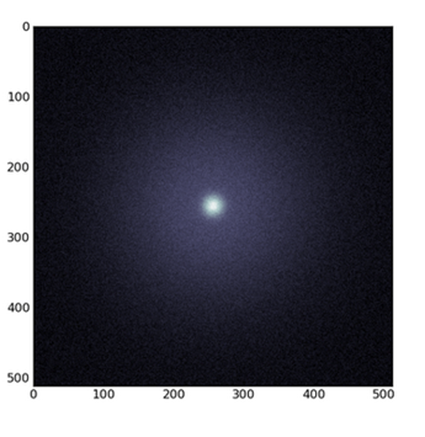



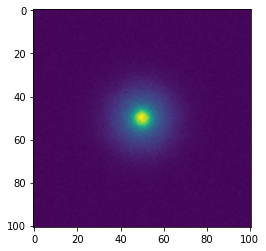

In [19]:
image = np.zeros((101,101))
image += np.random.normal(5,3, image.shape) #add background noise
def calc_gaussian_profile(x, y, center, max_val, sigma):
    x_0, y_0 = center
    value = max_val*np.exp(-((x-x_0)**2/(2 * sigma**2) + (y-y_0)**2/(2 * sigma**2))) #calculate pixel value from gaussian profile
    value += np.random.normal(value, np.sqrt(value))#offset to each pixel
    return value


image += np.fromfunction(lambda x, y : calc_gaussian_profile(x, y,(50,50),100,10), image.shape) #add first gaussian profile
image += np.fromfunction(lambda x, y : calc_gaussian_profile(x, y,(50,50),200,3), image.shape) #second gaussian
plt.imshow(image)
plt.show()

### (b)

Generate a 1-D profile from your array. 

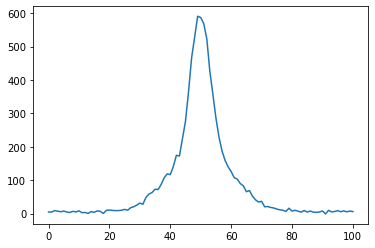

In [20]:
#profile = np.zeros(101)
##sums all the rows
#for row in image:
#    profile += row

profile = image[:, 50]

plt.plot(profile)
plt.show()

### (c)

Fit a double Gaussian to your 1-D profile, and plot the best model on top of the data. This is hard.<br> Skip this bit if needs be and come back to it.

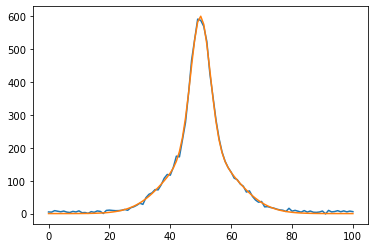

In [21]:
def double_gaussian_fit(x, center1, max_val1, sigma1, center2, max_val2, sigma2):
    first = max_val1*np.exp(-(x-center1)**2 /(2 * sigma1**2))
    second = max_val2*np.exp(-(x-center2)**2 /(2 * sigma2**2))
    return first + second

p0 = (50, 100, 10, 50, 20, 3)#initial guesses
popt, pcov = curve_fit(double_gaussian_fit, np.arange(profile.shape[0]), profile, p0=p0)
popt


plt.plot(profile)
plt.plot(double_gaussian_fit(np.arange(profile.shape[0]),*popt))
plt.show()

alternative 2-D plot?

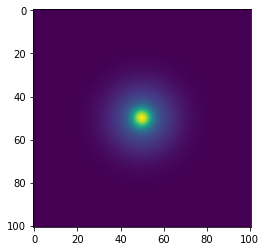

In [22]:
def gaussian_profile(x, y, center = (50,50), max_val = 100, sigma = 10 ):
    x_0, y_0 = center
    value = max_val*np.exp(-((x-x_0)**2/(2 * sigma**2) + (y-y_0)**2/(2 * sigma**2))) 
    return value

model_img = np.fromfunction(lambda x,y: gaussian_profile(x,y,(popt[0],popt[0]), popt[1], popt[2]), image.shape)
model_img += np.fromfunction(lambda x,y: gaussian_profile(x,y,(popt[3],popt[3]), popt[4], popt[5]), image.shape)
plt.imshow(model_img)
plt.show()

### (d)

Repeat exercise (a), but use Poisson deviation for the background and the 2nd Gaussian (i.e. it is not possible for the value to drop below 0).

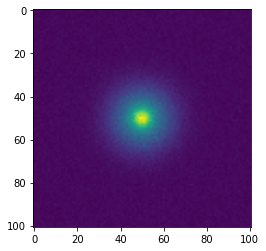

In [23]:
image = np.zeros((101,101))
image += np.random.poisson(10, image.shape) #add background noise with poisson
def calc_gaussian_profile_poisson(x, y, center, max_val, sigma):
    x_0, y_0 = center
    value = max_val*np.exp(-((x-x_0)**2/(2 * sigma**2) + (y-y_0)**2/(2 * sigma**2)))
    value += np.random.poisson(np.sqrt(value))#offset to each pixel using poisson distribution
    return value


image += np.fromfunction(lambda x, y : calc_gaussian_profile(x, y,(50,50),100,10), image.shape) #add first gaussian profile
image += np.fromfunction(lambda x, y : calc_gaussian_profile_poisson(x, y,(50,50),200,3), image.shape) #second gaussian
plt.imshow(image)
plt.show()

### (e)

Consider a 101 by 101 array:
+ Generate a list of several thousand random locations within your such array, e.g. [(3,75),(56,34)]
- Calculate how often one of your random locations falls within 10 pixels of any of the (straight) edges.
* Calculate how often one of your random locations falls in either of these regions: a) outside a circle with radius 40 pixels, b) within (inside) 10 pixels of the circle.

In [24]:
number_locations = 3000
edges = (0,101)
random_locations = [(np.random.randint(*edges), np.random.randint(*edges)) for i in range(number_locations)] #generate list of locations as [(x,y),...]

edge_counter = 0 #near edges
for x,y in random_locations:
    if (0+10 <= x <= 100-10) and (0+10 <= y <= 100-10):
        pass
    else:
        edge_counter += 1

print(f"Probability of location falling 10 pixels near edge: {edge_counter/number_locations :.3}")

outer_circle_counter = 0 #outside circle
for x,y in random_locations:
    radius = (x-50)**2 + (y-50)**2 #technically radius squared
    if radius > 40**2:
        outer_circle_counter += 1
    else: pass

print(f"Probability of location falling outside circle of radius 40 pixels: {outer_circle_counter/number_locations :.3}")

circle_counter = 0 # near circle
for x,y in random_locations:
    radius = (x-50)**2 + (y-50)**2 #technically radius squared
    if ((40-10)**2 < radius < (40+10)**2):
        circle_counter += 1
    else: pass

print(f"Probability of location falling 10 pixels near circle of radius 40 pixels: {circle_counter/number_locations :.3}")

Probability of location falling 10 pixels near edge: 0.359
Probability of location falling outside circle of radius 40 pixels: 0.509
Probability of location falling 10 pixels near circle of radius 40 pixels: 0.495


### (f)

Ask the user to input a location and let them know if that location is in one of the two regions in (e)- ••• . Allow repeat submissions, and allow the user to tell you when they want to move on.

In [25]:
def check_location(location):
    x,y = location
    #checks if it is within bounds of array
    if not (0<=x<=100) or not (0<=y<=100):
        print("outside array")
        return

    radius = (x-50)**2 + (y-50)**2
    #same if blocks as before
    if (40-10)**2 < radius < 40**2:
        print("This location is within 10pixels of the circle")
        return
    if radius > 40**2:
        print("This location is outside the circle")
        return
    print("This location is likely near the center of the circle unless I messed up somehow")
    return

#maybe recursion was a very innefficient, flawed and overlycomplex way to do this but i love recursion
def get_location():
    user_input = input('enter location in form \'x,y\' with x and y between 0 and 100 or don\'t I guess')
    #try catch block not ideal and could use isnumeric but it is being used to check when to end recursion loop
    try:
        location = [int(i) for i in user_input.split(',')]
    except ValueError:
        print('moving on')
        return
    if len(location) == 2:#if it was not length 2, either too many coordinates were entered 
        check_location(location)
        get_location()#calls recursively until a return is reached
    else: pass #since this could also be seen as an error, it could make sense to assert inside try catch block
    return

get_location()

This location is within 10pixels of the circle
moving on


### (g)

Generate a 101 by 101 array, then:
* add 3 synthetic “sources” by taking random locations and generating 2-D Gaussians around each one. Start with a peak value of 10 and a sigma of 3 (below left).
* Then add a noisy background that has a mean value of 3 and a sigma of 1 (below middle).
* Then set all values (sources and background) to zero outside a circle of radius 40 pixels (below right).
* Repeat 2 times (to make 6 images in total). Display all the images to the screen.


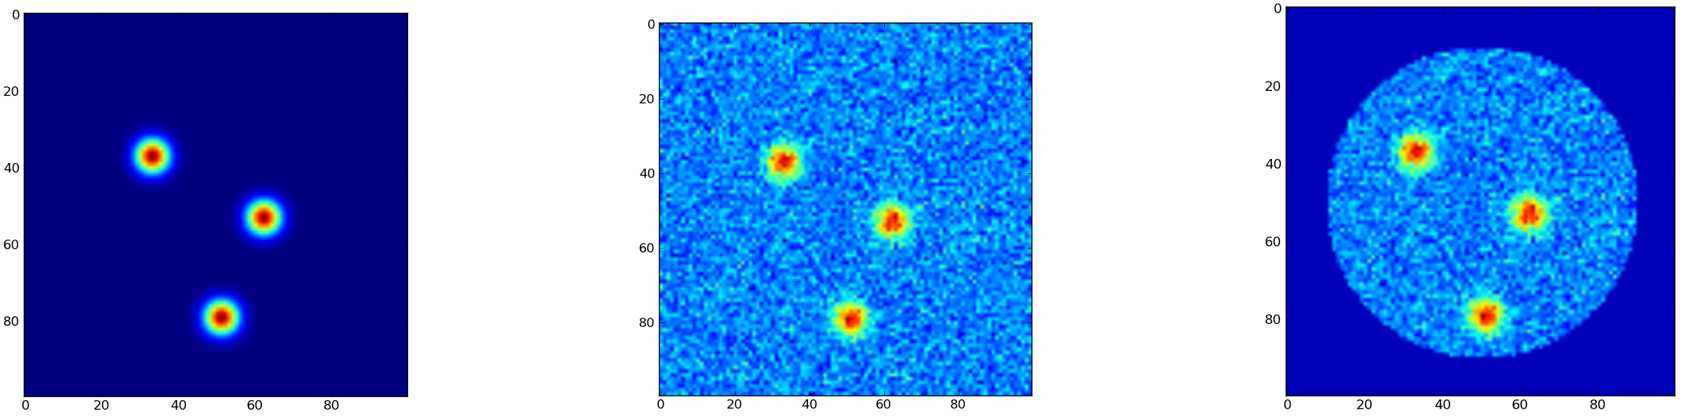

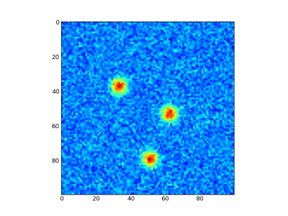
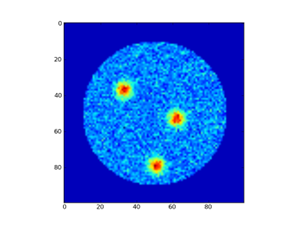
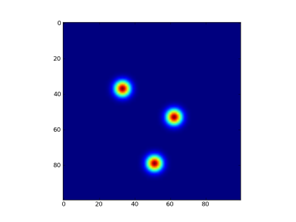

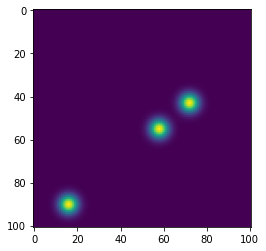

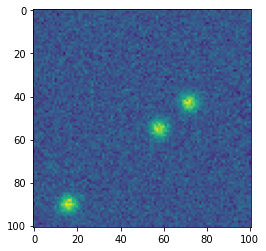

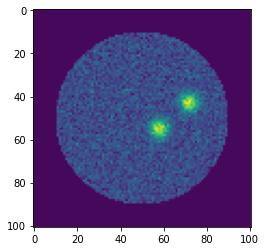

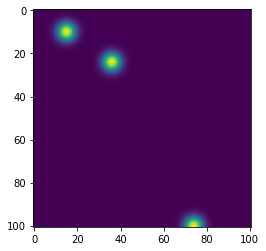

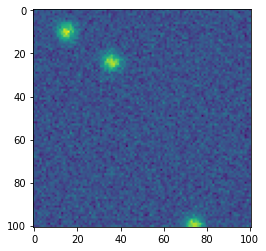

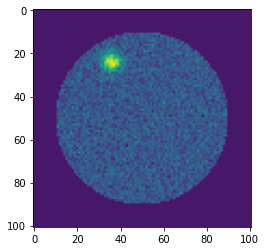

In [26]:

class SourceLocation:
    '''
    Store information about a source location and it's properties - Gaussian profile
    '''
    def __init__(self,x=None, y=None, peak=10, sigma=3):
        #if x and y undefined, randomly generated.
        if x is None:
            x = np.random.randint(0,101)
        if y is None:
            y = np.random.randint(0,101)
        self.x = x
        self.y = y
        self.peak = peak
        self.sigma = sigma
        self._calc_gaussian_profile()
         
    
    def _calc_gaussian_profile(self):

        def gaussian_profile(x, y, center = (50,50), max_val = 100, sigma = 10 ):
            #same gausian function as all the times before but encapsulated
            x_0, y_0 = center
            value = max_val*np.exp(-((x-x_0)**2/(2 * sigma**2) + (y-y_0)**2/(2 * sigma**2))) 
            return value

        self.signal = np.fromfunction(
            lambda x,y: gaussian_profile(x,y,(self.x,self.y),self.peak,self.sigma),
            (101,101)
            )
    
    def check_location(self):
        radius = (self.x-50)**2 + (self.y-50)**2
        #might clearer if it returned an enum
        if (40-10)**2 < radius < 40**2:
            return 'near edge'
        if radius > 40**2:
            return 'outside'
        return 'middle'

    def calc_percent_masked(self, mask):

        volume = 2*np.pi*self.peak* (self.sigma**2)
        masked_volume = np.sum(mask * self.signal)
        return masked_volume/volume




class Image:
    '''
    collate soruces into it's own object with ways of displaying
    '''
    def __init__(self, source_locations = None, background_mean = 3, background_sigma = 1):
        
        #for some reason i made it so it could have predefined locations, no idea why, i was tired
        if source_locations is None:
            self.source_locations = [SourceLocation() for i in range(3)]
        else: 
            self.source_locations = source_locations

        self.source_image = np.zeros((101,101))
        #source image is the sum of each sources' gaussian profile
        self.add_sources()

        self.background = np.random.normal(background_mean,background_sigma, self.source_image.shape)
        self.mask = np.fromfunction(lambda x,y: (x-50)**2+(y-50)**2 < 40**2, image.shape)
        self.image_with_background = self.source_image + self.background
        self.image_with_mask = self.mask*(self.source_image + self.background)
    
    def add_sources(self):
        #source image is the sum of each sources' gaussian profile
        #later renamed this to signal so i wouldn't need to morph this with inheritance
        for source in self.source_locations:
            self.source_image += source.signal

    def display_sources(self, source_image = None):
        #the reason i added this was purely for the vignetting :(
        if source_image is None:
            source_image = self.source_image
        plt.imshow(source_image)
        plt.show()

    def display_with_background(self, image_with_background = None):
        if image_with_background is None:
            image_with_background = self.image_with_background
        else:
            image_with_background += self.background
        plt.imshow(image_with_background)
        plt.show()

    def display_with_mask(self, image_with_mask = None):
        if image_with_mask is None:
            image_with_mask = self.image_with_mask
        else:
            image_with_mask = self.mask*(image_with_mask + self.background)
        plt.imshow(image_with_mask)
        plt.show()
    
    def check_source_locations(self, image_identifier):
        locations = [source.check_location() for source in self.source_locations]
        #definitly should've used enums
        near_edge = locations.count('near edge')
        outside = locations.count('outside')
        print(f'image {image_identifier} contains {near_edge} sources near circle inner edge, and contains {outside} outside the circle')
    
    def calc_percentages(self):
        #calculate percantage of each source in this image that is in zero region.
        for source in self.source_locations:
            percentage = source.calc_percent_masked(self.mask)
            print(f'source at location {source.x},{source.y}, signal is {(1 - percentage)*100 :.3f}% outside of circle')
    
    def calc_unknown_r(self):
        #for problem (i) , won't work without unknownbetamodel class as source
        for source in self.source_locations:
            estimate_percentage, actual = source.calc_unknown_r_percent(self.mask)
            error = np.abs(estimate_percentage-actual)
            print(f'source at location {source.x},{source.y}, signal estimate is {(1 - estimate_percentage)*100 :.3f}% outside of circle. \
            This is {error*100 :.3f} percentage from actual')

         
   
images = [Image() for i in range(2)]#generate list of image objects
for img in images:
    img.display_sources()
    img.display_with_background()
    img.display_with_mask()


### (h)

Run through each of your six images and alert the user if any of the sources therein falls within 10 pixels of the inside edge of your 40 pixel circle or in the “zero’d” region outside. [You will have to preserve the locations you used to generate the 6x3 sources]

In [27]:
#added to class
for img_num, img in enumerate(images):
    img.check_source_locations(img_num)

image 0 contains 0 sources near circle inner edge, and contains 1 outside the circle
image 1 contains 0 sources near circle inner edge, and contains 2 outside the circle


### (i)

Tell the user what percentage of the signal from each source fell into the "zero" region outside the circle. For that last bit, you can use your knowledge of the source location, normalisation and sigma [look up “volume under the gaussian function” in Wikipedia].

In [28]:
#added to class
for img_num, img in enumerate(images):
    print(f'image number {img_num}')
    img.calc_percentages()


image number 0
source at location 43,72, signal is 0.000% outside of circle
source at location 90,16, signal is 99.999% outside of circle
source at location 55,58, signal is 0.000% outside of circle
image number 1
source at location 100,74, signal is 100.000% outside of circle
source at location 10,15, signal is 100.000% outside of circle
source at location 24,36, signal is 0.026% outside of circle


### (j)
Switch to circularly symmetric “Beta-models’’  (see equation below) for your shapes and repeat steps (g),(h),(i)

$$ y=S_0(1 + (r/r_0)^2 )^{-1.5} $$
where r is the radius from the centre, $r_0$ is the “core” [use $r_0$=3 for now], $S_0$ is the normalisation [use 10 for now]. Note that the equivalent of step (i) is harder than before because you will need to numerically integrate [rather than using an analytical formula]


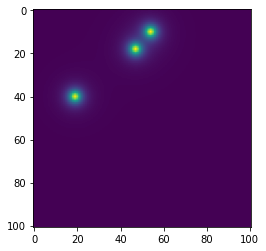

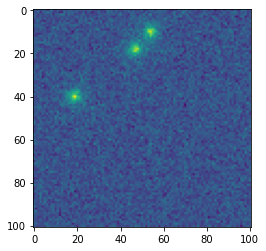

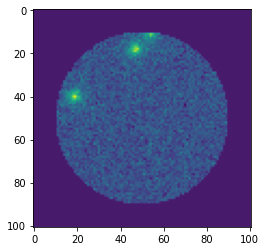

image 0 contains 2 sources near circle inner edge, and contains 1 outside the circle
source at location 10,54, signal is 60.268% outside of circle
source at location 40,19, signal is 17.225% outside of circle
source at location 18,47, signal is 16.773% outside of circle


In [29]:
class BetaModelsSource:
    '''
    Store information about a source location and it's properties - Beta Models
    '''
    def __init__(self, x=None,y=None, r_0=3,s_0=10):
        #if x and y undefined, randomly generated.
        if x is None:
            x = np.random.randint(0,101)
        if y is None:
            y = np.random.randint(0,101)
        self.x = x
        self.y = y
        self.r_0 = r_0
        self.s_0 = s_0
        self._calc_beta_models()
    
    def _calc_beta_models(self):
        def beta_model(x,y, center, r_0, s_0):
            x_0,y_0 = center
            r = np.sqrt((x-x_0)**2 + (y-y_0)**2)
            val = s_0 * np.power(1 + (r/r_0)**2,-1.5)
            return val
        
        self.signal = np.fromfunction(
            lambda x, y: beta_model(x,y,(self.x, self.y),self.r_0, self.s_0),
            (101,101)
        )
    

    def check_location(self):
        #this should be identical to gaussian
        radius = (self.x-50)**2 + (self.y-50)**2
        if (40-10)**2 < radius < 40**2:
            return 'near edge'
        if radius > 40**2:
            return 'outside'
        return 'middle'
    
    def calc_percent_masked(self, mask):
        masked_volume = np.sum(mask * self.signal)
        '''
        in polar, dA = rdr dtheta
        where theta would be angle
        circularly symetric so will become
        dA = 2pi r dr
        '''
        def integrand(r):
            dA = 2 * np.pi * r
            val = self.s_0 * np.power(1 + (r/self.r_0)**2,-1.5)*dA
            return val
        volume , err = quad(integrand, 0, np.inf)
        return masked_volume/volume
        

beta_model_image = Image(source_locations=[BetaModelsSource() for i in range(3)])#initiallising with pregenerated source objects using beta model

beta_model_image.display_sources()
beta_model_image.display_with_background()
beta_model_image.display_with_mask()
beta_model_image.check_source_locations(0)
beta_model_image.calc_percentages()

### (k)

Produce an image “with vignetting”: i.e. now the sensitivity of the “detector” is decreasing radially from 100% in the centre to 50% at the far corner. The functional form of this decrease is linear. Note that your background is not vignetted (so the expectation value does not change across the detector).

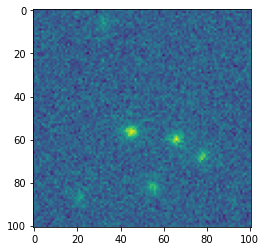

In [30]:
def vignette(x,y):
    r = np.sqrt((x-50)**2 + (y-50)**2)
    r_max = np.sqrt(50**2 + 50**2)
    return 1 - r/r_max

beta_model_image_vignetting = Image(source_locations=[BetaModelsSource() for i in range(6)])
#apply vignette to only source image(not backgorund)
vignette_image = beta_model_image_vignetting.source_image * np.fromfunction(vignette, beta_model_image_vignetting.source_image.shape)
beta_model_image_vignetting.display_with_background(vignette_image)

#None of this works well with OOP so mistake were definitly made


### (l)

repeat (j) when $1<r_0<5$ with a flat (constant) probability distribution and a well-known center. Since we don’t know what our value for $r_0$ is, we will make the assumption that $r_0$=3. Return the error in making this assumption. 

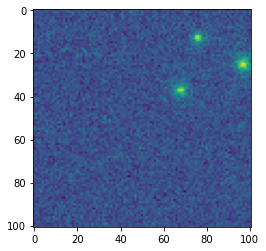

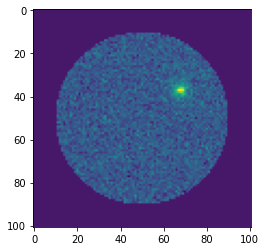

source at location 13,76, signal estimate is 94.552% outside of circle.             This is 4.176 percentage from actual
source at location 25,97, signal estimate is 94.525% outside of circle.             This is 1.133 percentage from actual
source at location 37,68, signal estimate is 29.972% outside of circle.             This is 21.299 percentage from actual


In [31]:
class UnknownBetaModelsSource(BetaModelsSource):
    '''
    inheriting from previous betamodelsource with unknown r_0
    '''
    def __init__(self, x=None,y=None, r_0=None,s_0=10):
        if r_0 is None:
            r_0 = 1 + (4 * np.random.rand()) #generate random float between 1 and 5
        super().__init__(x=x,y=y,r_0=r_0,s_0=s_0)
    
    def calc_unknown_r_percent(self, mask):
        masked_volume = np.sum(mask * self.signal)
        
        def integrand(r):
            #This integrand is the same as normal beta model except r_0 is assumed to be 3
            dA = 2 * np.pi * r
            val = self.s_0 * np.power(1 + (r/3)**2,-1.5)*dA
            return val
        volume_estimate , err = quad(integrand, 0, np.inf)
        estimate = masked_volume/volume_estimate
        actual = self.calc_percent_masked(mask)#this uses the actual r_0 value
        return (estimate,actual)
    

        
random_image = Image(source_locations=[UnknownBetaModelsSource() for i in range(3)])
random_image.display_with_background()
random_image.display_with_mask()
random_image.calc_unknown_r()


### (m)

similar to (l), but now you can know what your r0 value is, but you don’t know where the centre is. You can guess the centre using the brightest pixel in the “active” area, i.e. inside our circle. Return the error on your percentage of lost flux.

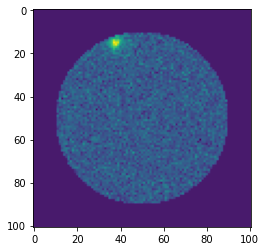

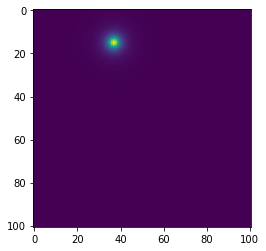

predicted percentage
source at location 15,37, signal is 32.217% outside of circle
actual percentage of all sources
source at location 15,38, signal is 30.402% outside of circle
source at location 10,7, signal is 97.667% outside of circle
source at location 5,88, signal is 97.699% outside of circle


In [37]:
#not sure how to do with random r_0 value will go back to constant r_0
#generate standard beta-model image
beta_model_image = Image(source_locations=[BetaModelsSource() for i in range(3)])
#find x,y of bright pixel
brightest = np.unravel_index(np.argmax(beta_model_image.image_with_mask), beta_model_image.image_with_mask.shape)
#display si i can see if it work
beta_model_image.display_with_mask()
#create new image only containing one source with r_0 = 3 at the location i expected
predicted_source_image = Image(source_locations=[BetaModelsSource(x=brightest[0], y = brightest[1])])
predicted_source_image.display_sources()
#the classes already ended up quite messy so print percentages like this
#i couldn't think of way to tell which source it had detected , if any so it will just print all
#usually quyite easy to tell which one if it isn't outside circle but for cases where they significantly overlap
#or they are just outside circle are a problem for someone smarter than me.
print("predicted percentage")
predicted_source_image.calc_percentages()
print("actual percentage of all sources")
beta_model_image.calc_percentages()

### (n)

repeat steps (j) through (m), but this using an elliptical beta model